<h1>Model Analysis<h1>

<h3>Combining predictions<h3>

In [1]:
import pandas as pd
import matplotlib

In [2]:
num_trips_pred_NN = pd.read_csv('../data/curated/model_data/num_trips_pred_nn.csv')

In [3]:
avg_driver_pay_pred_NN = pd.read_csv('../data/curated/model_data/avg_driver_pay_pred_nn.csv')

In [4]:
num_trips_pred_RF = pd.read_csv('../data/curated/model_data/num_trips_pred_rf.csv')

In [5]:
avg_driver_pay_pred_RF = pd.read_csv('../data/curated/model_data/avg_driver_pay_pred_rf.csv')

In [6]:
test_data = pd.read_csv('../data/curated/model_data/test_data.csv')

In [7]:
test_data.loc[:, 'prediction_num_trips_nn'] = num_trips_pred_NN['0']
test_data.loc[:, 'prediction_num_trips_rf'] = num_trips_pred_RF['prediction']

In [8]:
test_data.loc[:, 'prediction_avg_driver_pay_nn'] = avg_driver_pay_pred_NN['0']
test_data.loc[:, 'prediction_avg_driver_pay_rf'] = avg_driver_pay_pred_RF['prediction']

<h3>Graphing Results<h3>

Isolate a specific pickup location and day for graphing predictions vs reality

In [9]:
hourly_data = test_data.loc[test_data['Date'] == '2019-11-30'].loc[test_data['PU_Location_ID_3'] == 1]

In [10]:
hourly_data = hourly_data[['Avg_driver_pay', 'Num_trips', 'prediction_num_trips_nn','prediction_num_trips_rf','prediction_avg_driver_pay_nn', 'prediction_avg_driver_pay_rf']]

In [11]:
hourly_data.loc[:,'Hour'] = range(0,24,1)

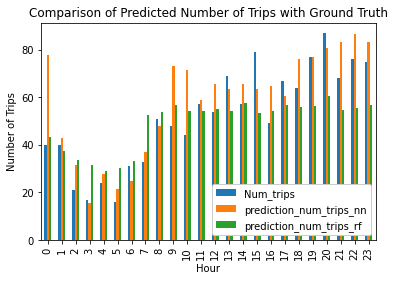

In [12]:
hourly_trips_pred_plt = \
hourly_data.plot.bar('Hour',['Num_trips','prediction_num_trips_nn', 'prediction_num_trips_rf'],\
                    title = "Comparison of Predicted Number of Trips with Ground Truth",\
                    ylabel = "Number of Trips").legend(loc = 'lower right', framealpha = 1)
hourly_trips_pred_plt.figure.savefig('../plots/hourly_trips_predictions.png', bbox_inches='tight')

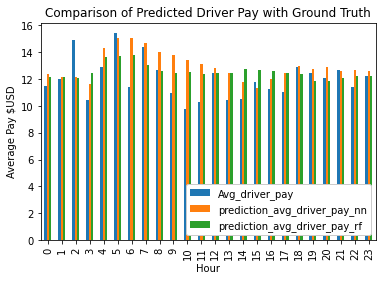

In [13]:
hourly_pay_pred_plt = \
hourly_data.plot.bar('Hour', ['Avg_driver_pay','prediction_avg_driver_pay_nn', 'prediction_avg_driver_pay_rf'], \
                    title = "Comparison of Predicted Driver Pay with Ground Truth", \
                    ylabel = "Average Pay $USD").legend(loc = 'lower right', framealpha = 1)
hourly_pay_pred_plt.figure.savefig('../plots/hourly_pay_predictions.png', bbox_inches='tight')

<h3>Workspace for comparing plots with different locations/dates<h3>

In [14]:
hourly_data2 = test_data.loc[test_data['Date'] == '2020-01-15'].loc[test_data['PU_Location_ID_132'] == 1]

In [15]:
hourly_data2 = hourly_data2[['Avg_driver_pay', 'Num_trips', 'prediction_num_trips_nn','prediction_num_trips_rf','prediction_avg_driver_pay_nn', 'prediction_avg_driver_pay_rf']]

In [16]:
hourly_data2.loc[:,'Hour'] = range(0,24,1)

<AxesSubplot:xlabel='Hour'>

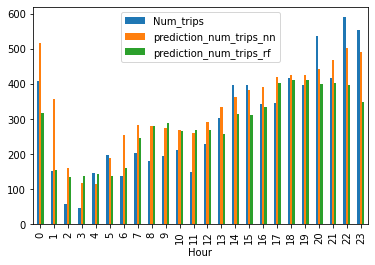

In [17]:
hourly_data2.plot.bar('Hour', ['Num_trips','prediction_num_trips_nn', 'prediction_num_trips_rf'])

<AxesSubplot:xlabel='Hour'>

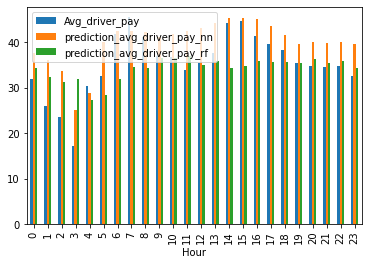

In [18]:
hourly_data2.plot.bar('Hour', ['Avg_driver_pay','prediction_avg_driver_pay_nn', 'prediction_avg_driver_pay_rf'])